<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser.loc[['nancy','bob']] #location

nancy    300
bob      foo
dtype: object

In [6]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [7]:
ser.iloc[2] #index location

300

In [8]:
'bob' in ser

True

In [9]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [10]:
ser * 2 # multiplies strings too

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [11]:
ser[['nancy', 'eric']] ** 2 # errors if strings present

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
#df is a collection of pd series
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [13]:
df = pd.DataFrame(d) #need to make dict into df
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

In [16]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple']) # select which indices to keep

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [18]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five']) #choose cols too

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [19]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [20]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [21]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [22]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [23]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [24]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [25]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [26]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [27]:
three = df.pop('three')

In [28]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [29]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [30]:
del df['two']

In [31]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [32]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [33]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [34]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [35]:
!cat ./movielens/movies.csv | wc -l

9126


In [36]:
!head -5 ./movielens/ratings.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [37]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [38]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [39]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [40]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [41]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [42]:
print(row_0)

userId                          15
movieId                        339
tag        sandra 'boring' bullock
Name: 0, dtype: object


In [43]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [44]:
row_0['userId']

15

In [45]:
'rating' in row_0

False

In [46]:
row_0.name

0

In [47]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [48]:
tags.head()

,userId,movieId,tag
0,15,339,sandra 'boring' bullock
1,15,1955,dentist
2,15,7478,Cambodia
3,15,32892,Russian
4,15,34162,forgettable


In [49]:
tags.index

RangeIndex(start=0, stop=1296, step=1)

In [50]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [52]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,1000] ]

,userId,movieId,tag
0,15,339,sandra 'boring' bullock
11,23,150,Ron Howard
1000,547,44199,toplist06


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [53]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [54]:
ratings.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


In [55]:
ratings['rating'].mean()

3.543608255669773

In [56]:
ratings.mean()

userId       347.011310
movieId    12548.664363
rating         3.543608
dtype: float64

In [57]:
ratings['rating'].min()

0.5

In [58]:
ratings['rating'].max()

5.0

In [ ]:
ratings['rating'].std()

In [59]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [66]:
ratings.corr() #how each index correlates with each other
#help(ratings.corr())

,userId,movieId,rating
userId,1.000000,0.007126,0.010467
movieId,0.007126,1.000000,-0.028894
rating,0.010467,-0.028894,1.000000


In [67]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
99974     False
99975     False
99976     False
99977     False
99978     False
99979     False
99980     False
99981     False
99982     False
99983     False
99984     False
99985     False
99986     False
99987     False
99988     False
99989     False
99990     False
99991     False
99992     False
99993     False
99994     False
99995     False
99996     False
99997     False
99998     False
99999     False
100000    False
100001    False
100002    False
100003    False
Name: rating, Length: 10

False

In [68]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [69]:
movies.shape

(9125, 3)

In [70]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [71]:
ratings.shape

(100004, 3)

In [72]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [73]:
tags.shape

(1296, 3)

In [74]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

We have some tags which are NULL.

In [75]:
tags = tags.dropna()

In [76]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [77]:
tags.shape

(1296, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e56fb87b8>]],
      dtype=object)

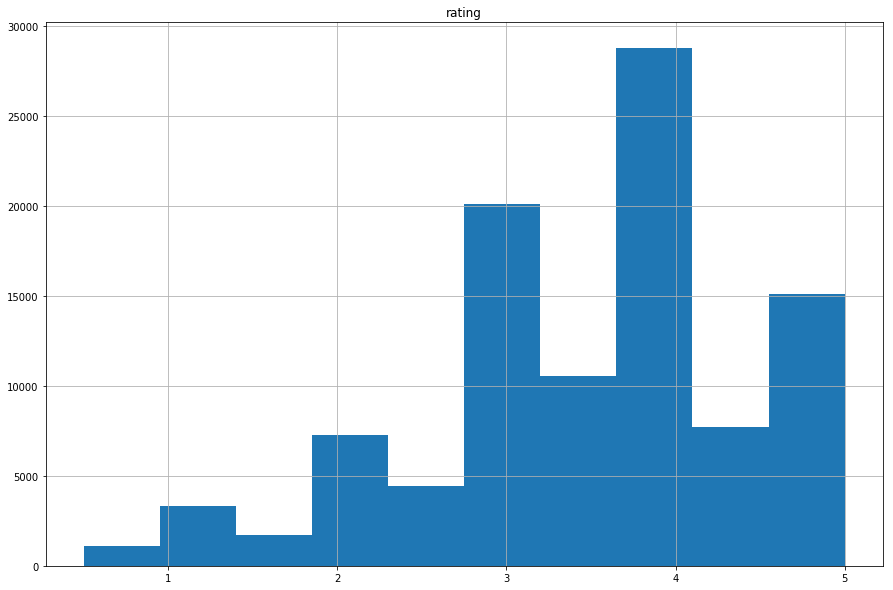

In [78]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

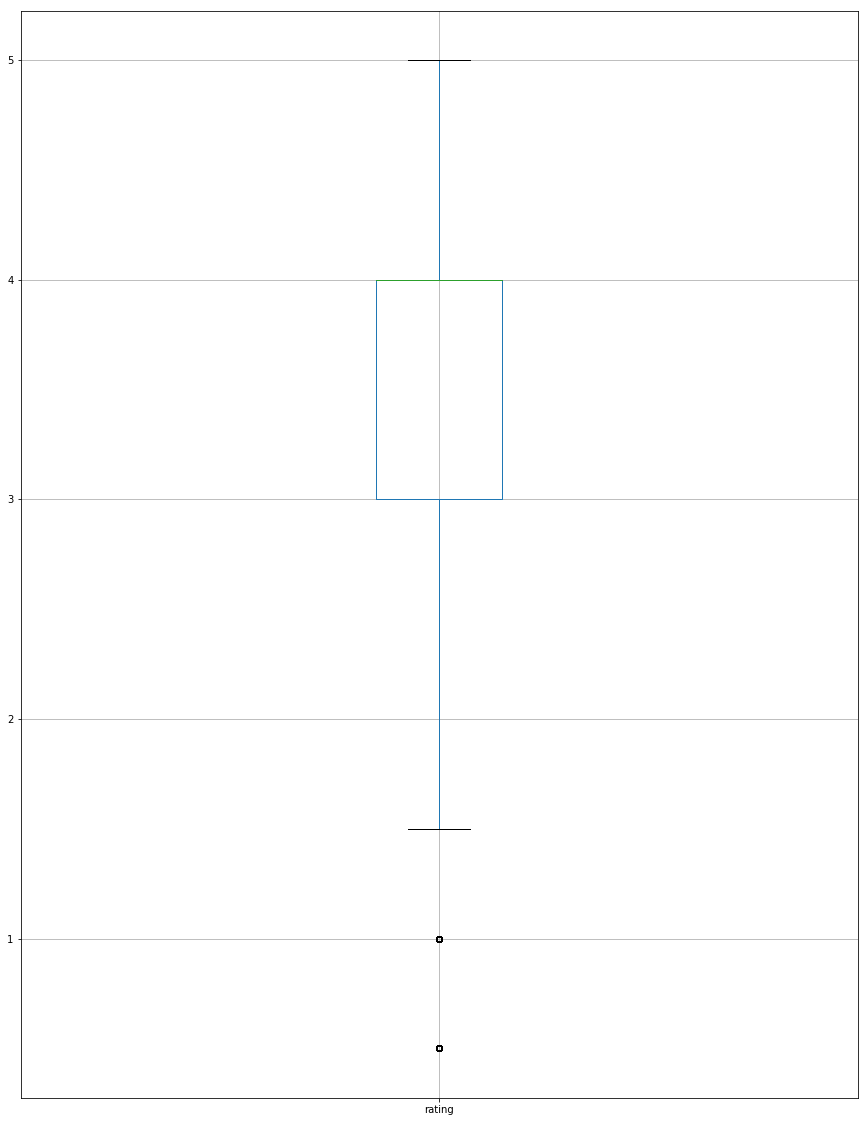

In [79]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [80]:
tags['tag'].head()

0    sandra 'boring' bullock
1                    dentist
2                   Cambodia
3                    Russian
4                forgettable
Name: tag, dtype: object

In [81]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [82]:
ratings[-10:]

,userId,movieId,rating
99994,671,5952,5.0
99995,671,5989,4.0
99996,671,5991,4.5
99997,671,5995,4.0
99998,671,6212,2.5
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5
100003,671,6565,3.5


In [83]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

dull story                  1
akira kurosawa              1
bollywood                   1
strippers                   1
existentialism              1
alternate universe          1
Satoshi Kon                 1
diluted version of comic    1
heartwarming                1
sexist                      1
Name: tag, dtype: int64

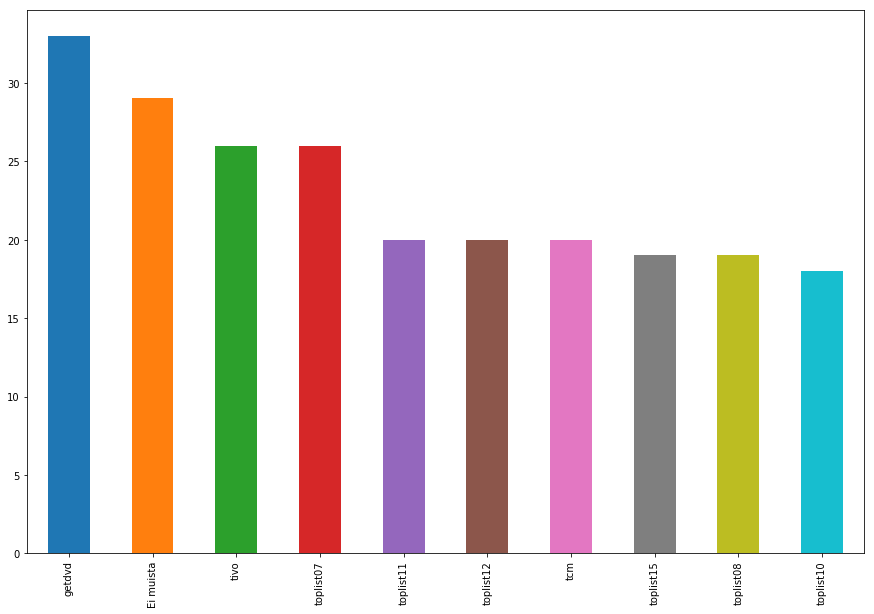

In [84]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [85]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating
83,2,551,5.0
85,2,585,5.0
89,2,589,5.0
90,2,590,5.0
91,2,592,5.0
94,2,661,4.0
95,2,720,4.0
97,3,110,4.0
100,3,296,4.5
101,3,318,5.0


In [86]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
521,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
526,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
527,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
528,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
537,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [87]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
46,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
211,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
216,244,Gumby: The Movie (1995),Animation|Children
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [88]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


In [89]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857


In [90]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,247
2,107
3,59
4,13
5,56


In [91]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
161944,1
162376,1
162542,1
162672,1
163949,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [92]:
tags.head()

,userId,movieId,tag
0,15,339,sandra 'boring' bullock
1,15,1955,dentist
2,15,7478,Cambodia
3,15,32892,Russian
4,15,34162,forgettable


In [93]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,501,Pixar
1,5,Father of the Bride Part II (1995),Comedy,431,steve martin
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,biblical
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,crime
4,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,dark


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [95]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [96]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [97]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
9055,160718,Piper (2016),Animation,4.0
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [98]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615
4,5,Father of the Bride Part II (1995),Comedy,3.267857
6,7,Sabrina (1995),Comedy|Romance,3.283019


In [99]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
9019,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,4.0
9023,153584,The Last Days of Emma Blank (2009),Comedy,5.0
9027,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,5.0
9037,158314,Daniel Tosh: Completely Serious (2007),Comedy,4.5
9052,160567,Mike & Dave Need Wedding Dates (2016),Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [100]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [ ]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [ ]:

tags['parsed_time'].dtype

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>